In [1]:
from fitting_strategies.jerphagnon1970 import Jerphagnon1970Strategy
from shg_analysis import SHGDataAnalysis


analysis = SHGDataAnalysis("results/20250820_1412_fitting_test")
strategy = Jerphagnon1970Strategy(analysis)

fringe = strategy._maker_fringes()

x = analysis.data["position"]
raw = analysis.data["intensity_corrected"]

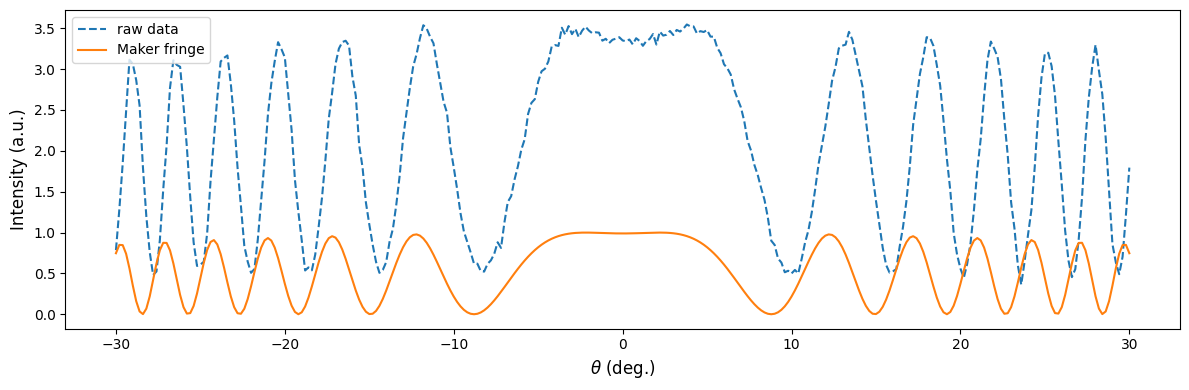

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(x, raw, label='raw data', linestyle='--')
ax.plot(x, fringe, label='Maker fringe')

ax.set_xlabel(r'$\theta$ (deg.)', fontsize=12)
ax.set_ylabel('Intensity (a.u.)', fontsize=12)

# ax.set_xlim(-20, 20)
# ax.set_ylim(0, 3.2)

fig.tight_layout()
ax.legend(loc='upper left')
plt.show()

In [3]:
results = strategy.fit_all()
print(results)

{'L_mm': 4.475733197423718, 'L_mm_std': 8.749881079382505e-05, 'k_scale': 3.007209959059195, 'k_scale_std': 0.006828759467439664, 'Lc_mean_mm': 0.019011658010458836, 'Lc_std_mm': 0.0011828386030384784, 'minima_count': 10, 'n_count': 8, 'Pm0': 3.0273210570180358, 'Pm0_stderr': 0.018613473768076635, 'n_peaks': 14, 'residual_rms': 0.06318074674313942}


center position:  0.8000000000000009


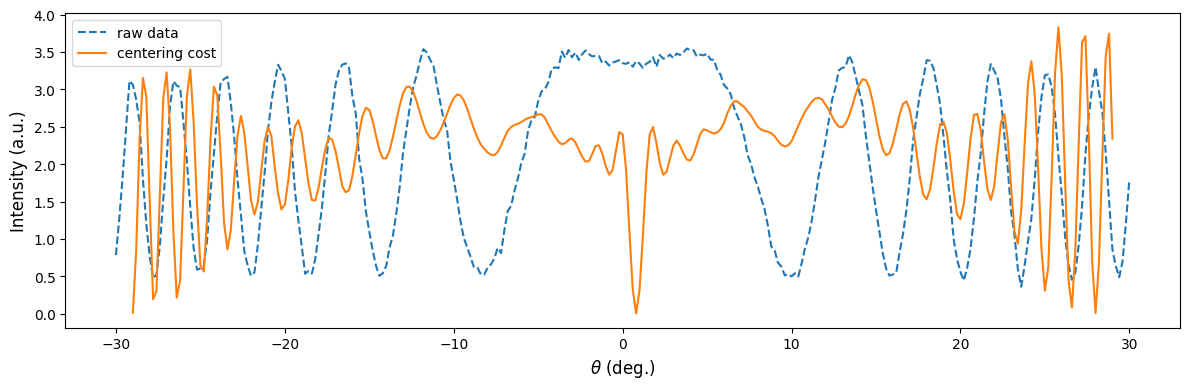

In [12]:
_, fit_centering = strategy._position_centering(analysis.data)
center_x = fit_centering["c_candidates"]
center_cost = fit_centering["costs"]
center = fit_centering["c_best"]
print("center position: ",fit_centering["c_best"])


plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(x, raw, label='raw data', linestyle='--')
ax.plot(center_x, center_cost, label='centering cost')

ax.set_xlabel(r'$\theta$ (deg.)', fontsize=12)
ax.set_ylabel('Intensity (a.u.)', fontsize=12)

# ax.set_xlim(-20, 20)
# ax.set_ylim(0, 3.2)

fig.tight_layout()
ax.legend(loc='upper left')
plt.show()


offset:  0.4919805833333333


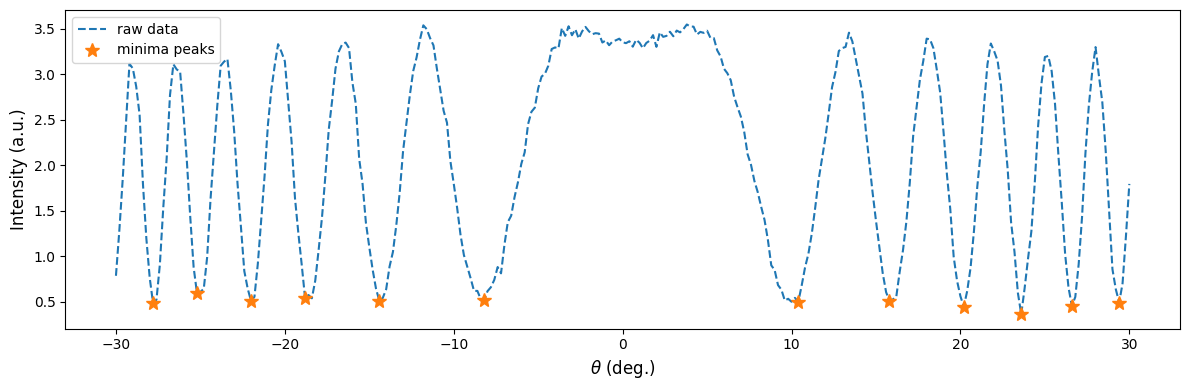

In [13]:
_, fit_offset = strategy._subtract_offset(analysis.data)
minima_x = x[fit_offset["minima_idx"]]
minima_y = raw[fit_offset["minima_idx"]]
offset = fit_offset["offset"]
print("offset: ",offset)


plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(x, raw, label='raw data', linestyle='--')
ax.plot(minima_x, minima_y, "*", ms=10, label='minima peaks')

ax.set_xlabel(r'$\theta$ (deg.)', fontsize=12)
ax.set_ylabel('Intensity (a.u.)', fontsize=12)

# ax.set_xlim(-20, 20)
# ax.set_ylim(-0.1, 3.2)

fig.tight_layout()
ax.legend(loc='upper left')
plt.show()


In [6]:
print(minima_x)

11    -27.8
24    -25.2
40    -22.0
56    -18.8
78    -14.4
109    -8.2
202    10.4
229    15.8
251    20.2
268    23.6
283    26.6
297    29.4
Name: position, dtype: float64


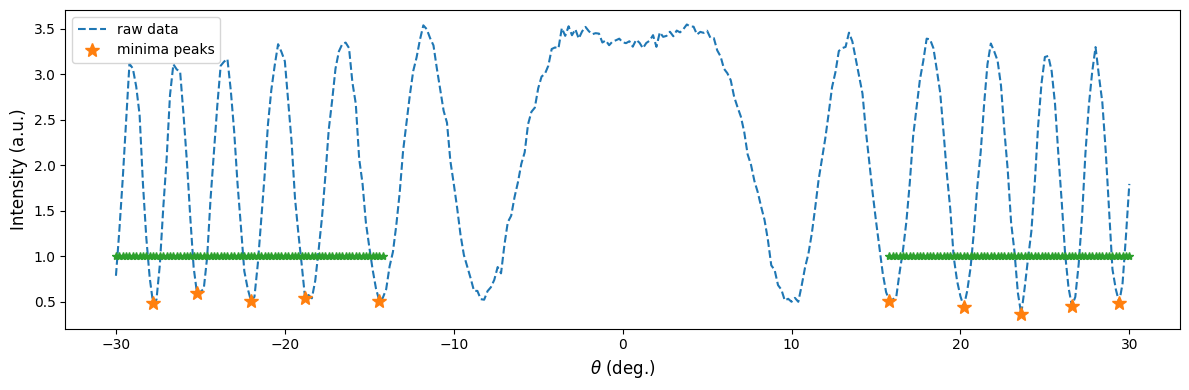

In [14]:
_, fit_Lc = strategy._calc_Lc_large_angle(analysis.meta, analysis.data, [15,180], results["L_mm"])
minima_x = x[fit_Lc["minima_idx"]]
minima_y = raw[fit_Lc["minima_idx"]]

theta_in_range = x[fit_Lc["x_in_range"]]
y = [1 for i in theta_in_range]


plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(x, raw, label='raw data', linestyle='--')
ax.plot(minima_x, minima_y, "*", ms=10, label='minima peaks')
ax.plot(theta_in_range, y, "*")

ax.set_xlabel(r'$\theta$ (deg.)', fontsize=12)
ax.set_ylabel('Intensity (a.u.)', fontsize=12)

# ax.set_xlim(-20, 20)
# ax.set_ylim(-0.1, 3.2)

fig.tight_layout()
ax.legend(loc='upper left')
plt.show()


In [8]:
print(fit_Lc["dL_pos"])
print(fit_Lc["dL_neg"])
print(fit_Lc["parts"])

[np.float64(0.02043731603690498), np.float64(0.01878398417233791), np.float64(0.018510724732105677), np.float64(0.01872856805227654)]
[np.float64(0.01743512404613435), np.float64(0.019804168738247897), np.float64(0.017748184022443665), np.float64(0.02064519428321969)]
[[np.float64(0.02043731603690498), np.float64(0.01878398417233791), np.float64(0.018510724732105677), np.float64(0.01872856805227654)], [np.float64(0.01743512404613435), np.float64(0.019804168738247897), np.float64(0.017748184022443665), np.float64(0.02064519428321969)]]


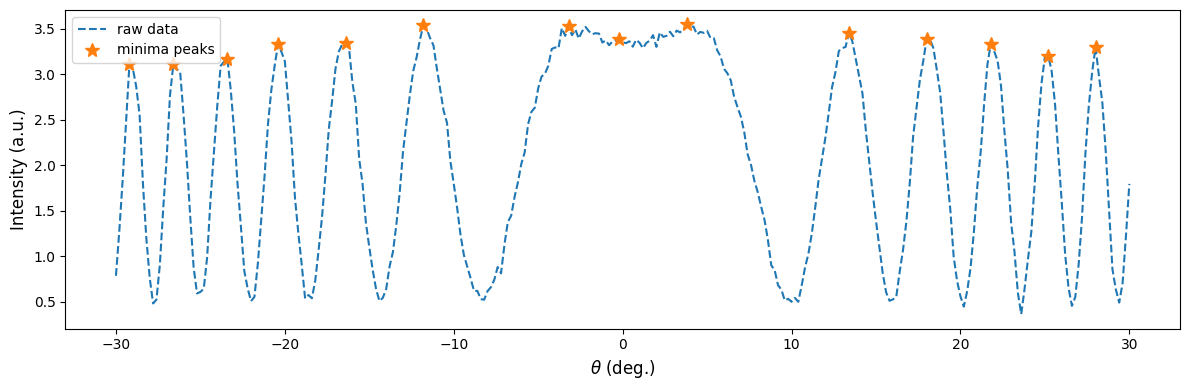

In [15]:
_, fit_Pm0 = strategy._fit_Pm0(analysis.data)
maxima_x = x[fit_Pm0["maxima_idx"]]
maxima_y = raw[fit_Pm0["maxima_idx"]]


plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(x, raw, label='raw data', linestyle='--')
ax.plot(maxima_x, maxima_y, "*", ms=10, label='minima peaks')

ax.set_xlabel(r'$\theta$ (deg.)', fontsize=12)
ax.set_ylabel('Intensity (a.u.)', fontsize=12)

# ax.set_xlim(-20, 20)
# ax.set_ylim(0.0, 4)

fig.tight_layout()
ax.legend(loc='upper left')
plt.show()


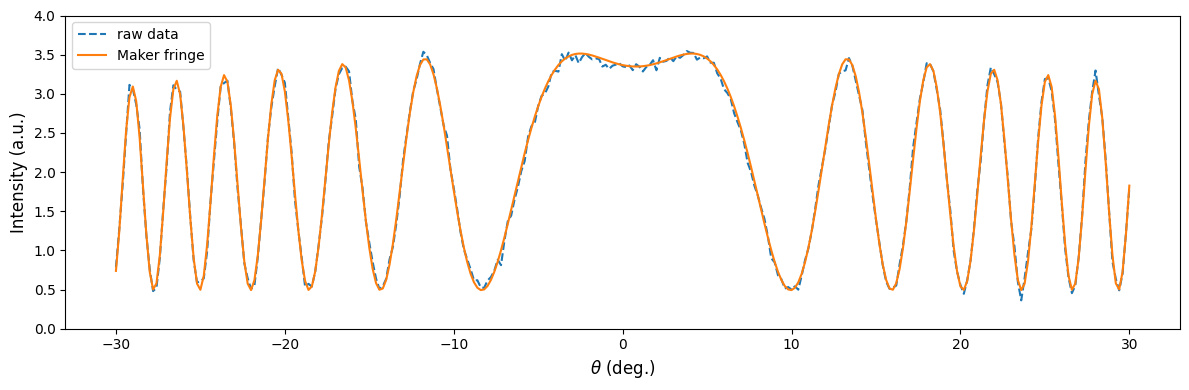

In [16]:
k = results["Pm0"]
L = results["L_mm"]
position_centered = strategy.analysis.data["position_centered"]


fitted_fringe = k * strategy._maker_fringes(override={"L":L, "theta_deg": position_centered}) \
      + offset

plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(x, raw, label='raw data', linestyle='--')
ax.plot(position_centered + center, fitted_fringe, label='Maker fringe')

ax.set_xlabel(r'$\theta$ (deg.)', fontsize=12)
ax.set_ylabel('Intensity (a.u.)', fontsize=12)

# ax.set_xlim(-20, 20)
ax.set_ylim(0, 4)

fig.tight_layout()
ax.legend(loc='upper left')
plt.show()